In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from scipy.spatial import ConvexHull

In [5]:
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

In [6]:
# Set up hierarchical clustering and stop at 3 clusters
num_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=num_clusters).fit(x)

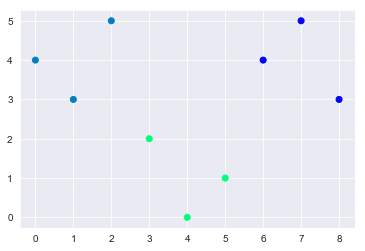

In [7]:
# Plot the data
sns.set_style("darkgrid")
# plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap=plt.get_cmap("winter"))

colors = plt.get_cmap("winter")
points = plt.scatter(x[:, 0], x[:, 1], c=hierarchical.labels_,
            cmap=colors)

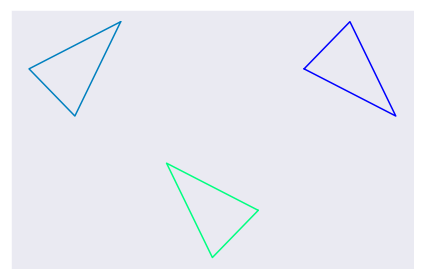

In [8]:
# Draw in the cluster regions
regions = defaultdict(list)
# Split points based on cluster
for index, label in enumerate(hierarchical.labels_):
    regions[label].append(list(x[index]))

# If a cluster has more than 2 points, find the convex hull for the region
# Otherwise just draw a connecting line
for key in regions:
    cluster = np.array(regions[key])
    if len(cluster) > 2:
        hull = ConvexHull(cluster)
        vertices = hull.vertices
        vertices = np.append(vertices, hull.vertices[0])
        plt.plot(cluster[vertices, 0], cluster[vertices, 1],
                 color=points.to_rgba(key))
    else:
        np.append(cluster, cluster[0])
        x_region, y_region = zip(*cluster)
        plt.plot(x_region, y_region, color=points.to_rgba(key))

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()